In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:/Users/SAIDHANUSH/train.csv',sep='\t')

In [3]:
df1=pd.read_csv(r'C:/Users/SAIDHANUSH/test.csv',sep='\t')

In [87]:
df.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


,text,label
id,,
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0
5,"When Reese Witherspoon was 17, she had already...",0
6,It’s official! WAGS Miami stars Ashley Nicole ...,0


In [ ]:
df2.index.name='id'

In [ ]:
df2.head()

In [ ]:
df1.shape

In [88]:
df1.head()

,id,text
0,2,The 2017 Teen Choice Awards ceremony was held ...
1,3,"The concert, part of “The Joshua Tree Tour,” w..."
2,4,Selena Gomez refuses to talk to her mother abo...
3,5,This is worse than a lump of coal in your stoc...
4,6,Luann De Lesseps is going to rehab after her a...


In [ ]:
df1.drop(index,inplace=True)

In [4]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=False,strip_accents='ascii',stop_words=stopset)

In [5]:
vector.fit(df)

TfidfVectorizer(lowercase=False,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

In [6]:
vector.transform(df1)#we have to use only transform instead of fit_transform in test data

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [7]:
y=df.label
x=vector.fit_transform(df.text)


In [95]:
x.shape

(4987, 83211)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.3)

In [ ]:
clf = naive_bayes.MultinomialNB()
model=clf.fit(x_train, y_train)

In [ ]:
p=model.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score


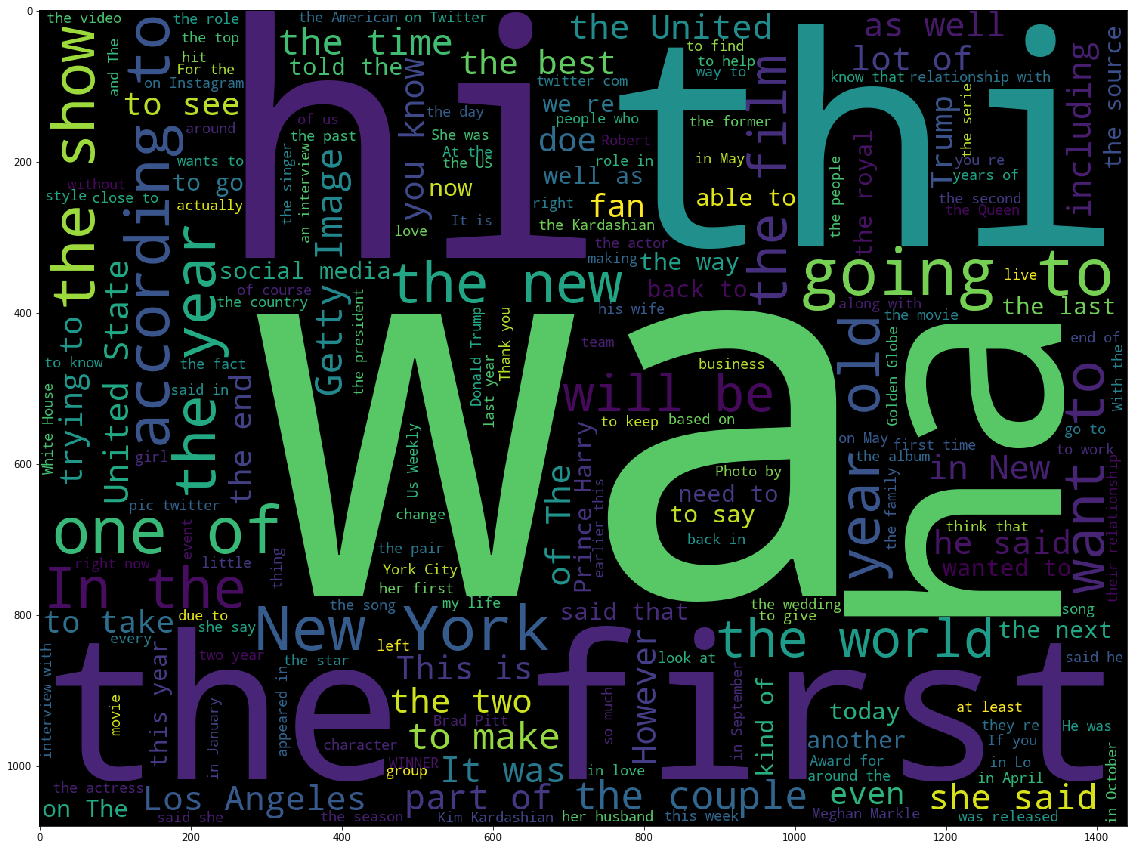

In [11]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(df['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)

In [ ]:
print(accuracy_score(y_test,p))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
pp=clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test,pp))

In [135]:
import xgboost

In [142]:
import numpy as np

In [168]:
clf1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing='nan', monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
clf1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing='nan', monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
pr=clf1.predict(x_test)

In [171]:
print(accuracy_score(y_test,pr))

0.7828991315965264


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
pred=knn.predict(x_test)

In [ ]:
print(accuracy_score(y_test,pred))

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
fore=RandomForestClassifier(criterion='gini')

In [132]:
fore.fit(x_train,y_train)

RandomForestClassifier()

In [133]:
pppp=fore.predict(x_test)

In [134]:
print(accuracy_score(y_test,pppp))

0.7641950567802271


In [98]:
from sklearn import svm

In [99]:
sv=svm.SVC(gamma=0.01,C=1,kernel='linear')

In [111]:
sv.fit(x_train,y_train)

SVC(C=1, gamma=0.01, kernel='linear')

In [112]:
predi=sv.predict(x_test)

In [113]:
print(accuracy_score(y_test,predi))

0.7808951235804943


In [ ]:
from sklearn.model_selection import GridSearchCV
params={'C':[100,1,10],
        'gamma':[0.01,0.001,0.0001],
         'kernel':['linear']}
grid=GridSearchCV(svm.SVC(),params,refit=True,verbose=3)
grid.fit(x_train,y_train)


In [ ]:
dir(sv)

In [ ]:
grid.best_params_

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
l=LogisticRegression()

In [121]:
l.fit(x_train,y_train)

LogisticRegression()

In [122]:
pl=l.predict(x_test)

In [123]:
print(accuracy_score(y_test,pl))

0.7688710754843019


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
l.fit(x_train,y_train)

In [ ]:
pl=l.predict(x_test)

In [ ]:
print(accuracy_score(y_test,pl))

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

clf = LogisticRegression()
model_res = clf.fit(x_train_res, y_train_res)

In [ ]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=False,strip_accents='ascii',stop_words=stopset)

In [ ]:
vector.fit(df1)

In [103]:
x_t=vector.transform(df1.text)

In [173]:
pss=clf1.predict(x_t)

In [174]:
pss

array(['0', '0', '1', ..., '1', '0', '0'], dtype=object)

In [ ]:
x_t.shape

In [ ]:
df1.head()

In [ ]:
pss=sv.predict(x_t).reshape(x_train.shape)

In [175]:
my=pd.DataFrame({'id':df1['id'],'label':pss})
my.to_csv('submission1121.csv',index=False)